# ワードクラウドの作成
-----
- 小説などテキストから単語の頻度に応じて、サイズや色を変えた画像を作成するデータ可視化の手法

In [ ]:
!apt install aptitude

In [ ]:
!aptitude install git make curl xz-utils file -y
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 -y
!apt-get -y install fonts-ipafont-gothic

In [ ]:
!pip3 install mecab-python3==0.7

Colaboratoryで新規ノート作成から、ここまでに約1分前後かかる場合があります。



In [18]:
import os.path
import glob
import re
import pandas as pd
import zipfile
import urllib.request
import IPython
from IPython.display import Image, display
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import MeCab

fpath = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
wc = WordCloud(background_color='ivory',width=480,height=360,font_path=fpath)

In [22]:
def download(URL):
    zip_file = re.split(r'/', URL)[-1]
    urllib.request.urlretrieve(URL, zip_file)
    dir = os.path.splitext(zip_file)[0]
    with zipfile.ZipFile(zip_file) as zip_object:
        zip_object.extractall(dir)
    os.remove(zip_file)
    path = os.path.join(dir,'*.txt')
    list = glob.glob(path)
    return list[0]

def convert(download_text):
    data = open(download_text, 'rb').read()
    text = data.decode('shift_jis')
    text = re.split(r'\-{5,}', text)[2]
    text = re.split(r'底本：', text)[0]
    text = re.split(r'［＃改ページ］', text)[0]
    text = re.sub(r'《.+?》', '', text)
    text = re.sub(r'［＃.+?］', '', text)
    text = re.sub(r'｜', '', text)
    text = re.sub(r'\r\n', '', text)
    text = re.sub(r'\u3000', '', text)
    text = re.sub(r'「', '', text)
    text = re.sub(r'」', '', text)
    text = re.sub(r'、', '', text)
    text = re.sub(r'。', '', text)
    return text

def extract(text):
    words = []
    tagger = MeCab.Tagger('-Ochasen')
    tagger.parse('')
    node = tagger.parseToNode(text)
    while node:
        if node.feature.split(',')[0] == u'名詞':
            words.append(node.surface)
        node = node.next
    text_result = ' '.join(words)
    return text_result

def tfidf_fig(title,url):
    download_file = download(url)
    text = convert(download_file)
    text = extract(text)

    wc.generate(text)
    fig = f'wc-{title}.png'
    wc.to_file(fig)
    # IPython.display.Image(fig)

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform([text])
    values = X.toarray()
    feature_names = vectorizer.get_feature_names_out()
    df = pd.DataFrame(values, columns = feature_names, index=[title])
    for i in df.index:
       print(df.loc[i].sort_values(ascending=False).head(20))
    display(df.head())

    return fig


こと     0.671348
よう     0.296361
更衣     0.254023
おいで    0.217734
皇子     0.193542
もの     0.187494
女御     0.145156
それ     0.114915
悲しみ    0.114915
たち     0.108867
自分     0.108867
宮中     0.096771
未亡人    0.096771
大臣     0.090723
若宮     0.090723
御殿     0.084674
思召     0.078626
命婦     0.078626
源氏     0.072578
これ     0.060482
Name: 源氏物語, dtype: float64


,あと,あなた,あまり,あれ,いじめ,いちばん,いっしょ,いっそう,いつ,いのち,...,食欲,養生,饗宴,騒ぎ,驚き,高僧,高官,高貴,高麗,麗人
源氏物語,0.012096,0.036289,0.006048,0.012096,0.006048,0.006048,0.030241,0.006048,0.006048,0.006048,...,0.006048,0.006048,0.012096,0.006048,0.012096,0.006048,0.006048,0.012096,0.012096,0.030241


三国志    0.590554
人物     0.295277
もの     0.210912
中国     0.210912
原本     0.126547
治乱     0.126547
小説     0.126547
大陸     0.126547
登場     0.126547
興亡     0.126547
これ     0.126547
こと     0.126547
古典     0.084365
色彩     0.084365
現在     0.084365
現代     0.084365
今日     0.084365
人間     0.084365
地名     0.084365
舞台     0.084365
Name: 三国志, dtype: float64


,あまり,いずれ,こと,これ,そう,そこ,その他,それ,はず,ほか,...,長所,長期,長篇,随所,随時,雄大,雑多,難渋,音楽,魅力
三国志,0.042182,0.042182,0.126547,0.126547,0.042182,0.042182,0.042182,0.042182,0.042182,0.042182,...,0.042182,0.042182,0.042182,0.042182,0.042182,0.042182,0.084365,0.042182,0.084365,0.042182


こと    0.500674
論語    0.471223
孔子    0.274880
もの    0.255246
それ    0.245429
政治    0.166891
儒教    0.137440
時代    0.127623
国民    0.117806
よう    0.107989
人間    0.098171
理想    0.098171
生活    0.098171
意味    0.098171
精神    0.088354
言葉    0.088354
国家    0.078537
人物    0.068720
今日    0.068720
大夫    0.068720
Name: 現代訳論語, dtype: float64


,あと,いくら,うち,うのみ,かかわり,かぎり,かく,かた,かなり,から,...,静か,順序,頻発,飛躍,高潮,高等,魯公,魯国,魯斉,魯論
現代訳論語,0.029451,0.009817,0.019634,0.009817,0.009817,0.019634,0.019634,0.009817,0.009817,0.009817,...,0.009817,0.009817,0.009817,0.019634,0.009817,0.009817,0.009817,0.019634,0.009817,0.009817


もの     0.477317
主人     0.452093
よう     0.344890
吾輩     0.233323
それ     0.223621
これ     0.198882
ところ    0.174143
迷亭     0.166382
そう     0.144553
寒月     0.138732
先生     0.132911
人間     0.131941
さん     0.126605
細君     0.102837
自分     0.084889
うち     0.074217
ため     0.067911
金田     0.057724
東風     0.057239
今日     0.055784
Name: 吾輩は猫である, dtype: float64


,agnodice,aliud,amicitiae,and,boy,cos,cup,do,est,hierophilus,...,鼠色,鼠賊,鼻孔,鼻息,鼻柱,鼻梁,鼻毛,鼻汁,鼻筋,齷齪
吾輩は猫である,0.00194,0.000485,0.000485,0.000485,0.000485,0.00194,0.000485,0.000485,0.000485,0.000485,...,0.001455,0.000485,0.000485,0.00097,0.000485,0.000485,0.003881,0.002425,0.000485,0.000485


三四郎    0.523918
よう     0.294286
もの     0.262330
与次郎    0.260844
さん     0.245981
先生     0.232605
美禰子    0.230375
こと     0.227403
それ     0.215512
野々     0.141941
自分     0.127821
ところ    0.126335
広田     0.114444
これ     0.102554
そう     0.099582
うち     0.098095
ぼく     0.078773
ため     0.069113
ほう     0.069113
原口     0.069113
Name: 三四郎, dtype: float64


,10,affect,akin,amaranth,and,answer,au,corps,diable,geschehen,...,黒子,黒山,黒板,黒目,黙然,黴菌,鼓膜,鼠色,鼻筋,鼻緒
三四郎,0.001486,0.000743,0.001486,0.000743,0.000743,0.000743,0.000743,0.000743,0.000743,0.000743,...,0.001486,0.001486,0.003716,0.000743,0.000743,0.000743,0.000743,0.000743,0.000743,0.002229


先生     0.814755
奥さん    0.292353
それ     0.255609
よう     0.239634
もの     0.191707
あなた    0.108634
自分     0.076683
これ     0.070293
言葉     0.068695
うち     0.068695
そこ     0.057512
人間     0.051122
ため     0.047927
どこ     0.046329
病気     0.044732
そう     0.044732
問題     0.039939
意味     0.038341
通り     0.035146
ところ    0.033549
Name: こころ, dtype: float64


,あか,あくび,あじ,あすこ,あたり,あちら,あと,あなた,あの世,あまり,...,骨董,魔物,鳥取,鳴り,鳶色,鹿児島,麦藁,麦酒,黄葉,鼓動
こころ,0.001598,0.001598,0.001598,0.004793,0.001598,0.003195,0.01278,0.108634,0.001598,0.001598,...,0.001598,0.001598,0.001598,0.001598,0.001598,0.001598,0.001598,0.003195,0.001598,0.003195


源氏物語


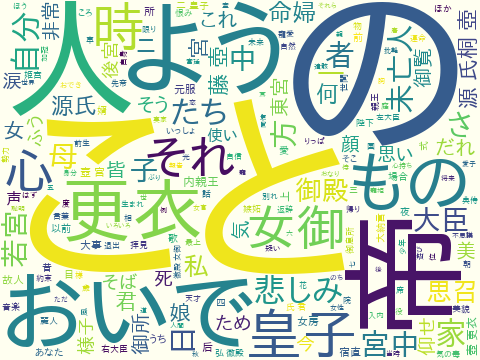

三国志


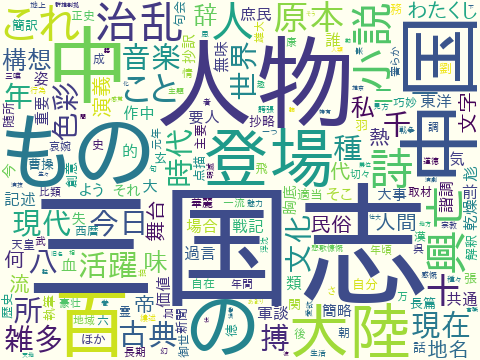

現代訳論語


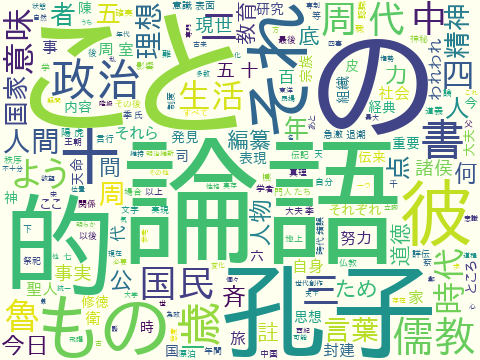

吾輩は猫である


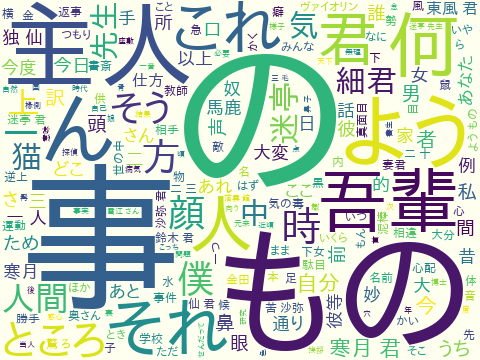

三四郎


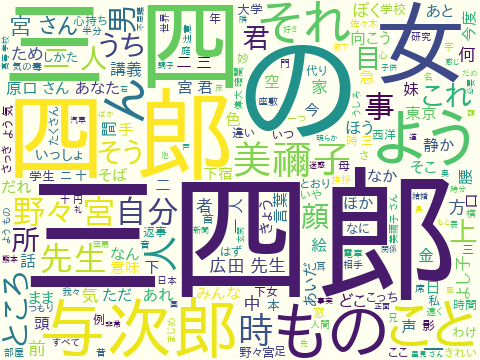

こころ


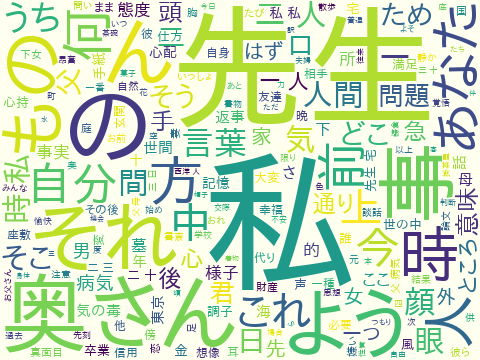

In [23]:
# 青空文庫のタイトル、ファイルURL
Books = {
    '源氏物語' : 'https://www.aozora.gr.jp/cards/000052/files/5016_ruby_9746.zip',
    '三国志' : 'https://www.aozora.gr.jp/cards/001562/files/52409_ruby_51058.zip',
    '現代訳論語' : 'https://www.aozora.gr.jp/cards/001097/files/43785_ruby_58793.zip',
    '吾輩は猫である' : 'https://www.aozora.gr.jp/cards/000148/files/789_ruby_5639.zip',
    '三四郎' : 'https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip',
    'こころ' : 'https://www.aozora.gr.jp/cards/000148/files/773_ruby_5968.zip',
}

def main():
  images = []
  for k,v in Books.items():
    images += [(k,tfidf_fig(k,v))]

  for fig in images:
    print(fig[0])
    display(Image(fig[1]))

main()